# Noise Reduction Using PCA

In this notebook, we demonstrate how multivariate time series can be denoised using linear autoencoding (PCA).

This denoising procedure can be used to enhance visualization in monitoring systems (plot trends instead of anomalies), as well as for automatic anomaly detection (compute and threshold the difference between the original series and reconstructions). 

In [81]:
import numpy as np
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
plt.rcParams.update({'pdf.fonttype': 'truetype'})

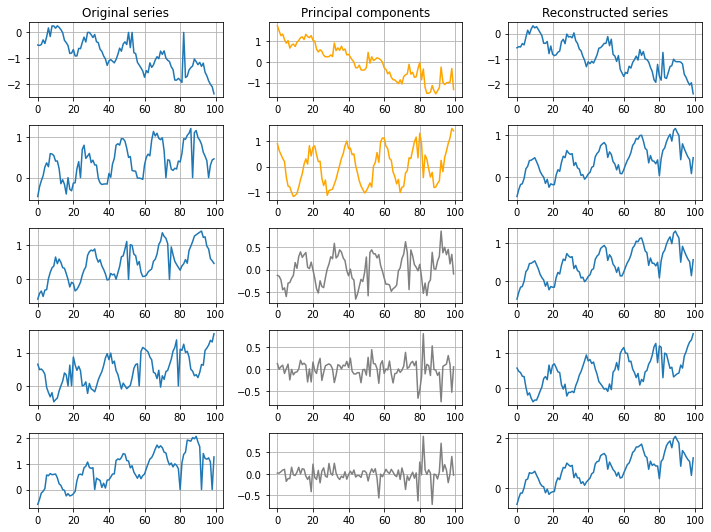

In [93]:
n_components = 2
n_series = 5
n_series_lenght = 100

def generate_series(n, phase_scale = 5, noise_sigma = 0.1):
    trend = np.random.randn(1) * np.linspace(0, phase_scale, n)
    
    phase = np.random.rand(1)
    cycles = np.sin(2 * np.pi * (np.linspace(0, phase_scale, n) + phase))
    
    outage = np.random.binomial(1, 0.95, n)
    
    return outage*(0.3*trend + 0.5*cycles + noise_sigma * np.random.randn(n))


x = np.array([generate_series(n_series_lenght) for i in range(n_series)]).T

fig, ax = plt.subplots(n_series, 3, figsize=(10, n_series*1.5))
ax[0, 0].set_title('Original series')
for i in range(n_series):
    ax[i, 0].plot(x[:, i])
    ax[i, 0].grid(True)

pca = PCA(n_components=n_series)
z = pca.fit_transform(x)
ax[0, 1].set_title('Principal components')
for i in range(n_series):
    if i < n_components:
        ax[i, 1].plot(z[:, i], color='orange')
    else:
        ax[i, 1].plot(z[:, i], color='gray')
    ax[i, 1].grid(True)

z_trunc = z.copy()
z_trunc[:, n_components:] = 0
x_hat = pca.inverse_transform(z_trunc)
ax[0, 2].set_title('Reconstructed series')
for i in range(n_series):
    ax[i, 2].plot(x_hat[:, i])
    ax[i, 2].grid(True)

plt.tight_layout()
plt.savefig('pca.pdf')